### Capstone Two: Preprocessing and Training Data Development

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
clean_df = pd.read_csv('Clean_df.csv')

In [3]:
clean_df.head()

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,0,0


In [4]:
missing_values = clean_df.isnull().mean()*100
missing_values.sum()

0.0

In [5]:
cont_features = []
cat_features = []

for c in clean_df.columns:
    if clean_df[c].dtype == 'int64':
        cont_features += [c]
    else:
        cat_features += [c]

In [6]:
cat_features

['eligible',
 'job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [7]:
# applying one-hot encoder on categorical features
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(clean_df[cat_features]))

# adding back indexes
OH_cols.index = clean_df.index

# keeping just the continuous features
df_cont = clean_df.drop(cat_features, axis=1)

# adding back encoded categoricals to continous features
df_OH = pd.concat([df_cont, OH_cols], axis=1)

In [8]:
df_OH.head()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,y,...,38,39,40,41,42,43,44,45,46,47
0,58,5,100000,2143,5,261,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,4,60000,29,5,151,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,3,120000,2,5,76,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,4,20000,1506,5,92,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,3,0,1,5,198,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
k=-1
count = len([i for i in df_OH['pdays'] if i == k])
count

36954

Delete pdays as this column has mostly  -1 value.

In [10]:
df_OH.drop(columns='pdays', inplace=True)

Also delete 'age group' column as not necessary

In [11]:
df_OH.drop(columns='age group', inplace=True)

In [12]:
df_OH.describe()

,age,salary,balance,day,duration,campaign,previous,y,response,0,...,38,39,40,41,42,43,44,45,46,47
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,0.580323,0.116985,0.116985,0.040499,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,2.303441,0.321406,0.321406,0.197129,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


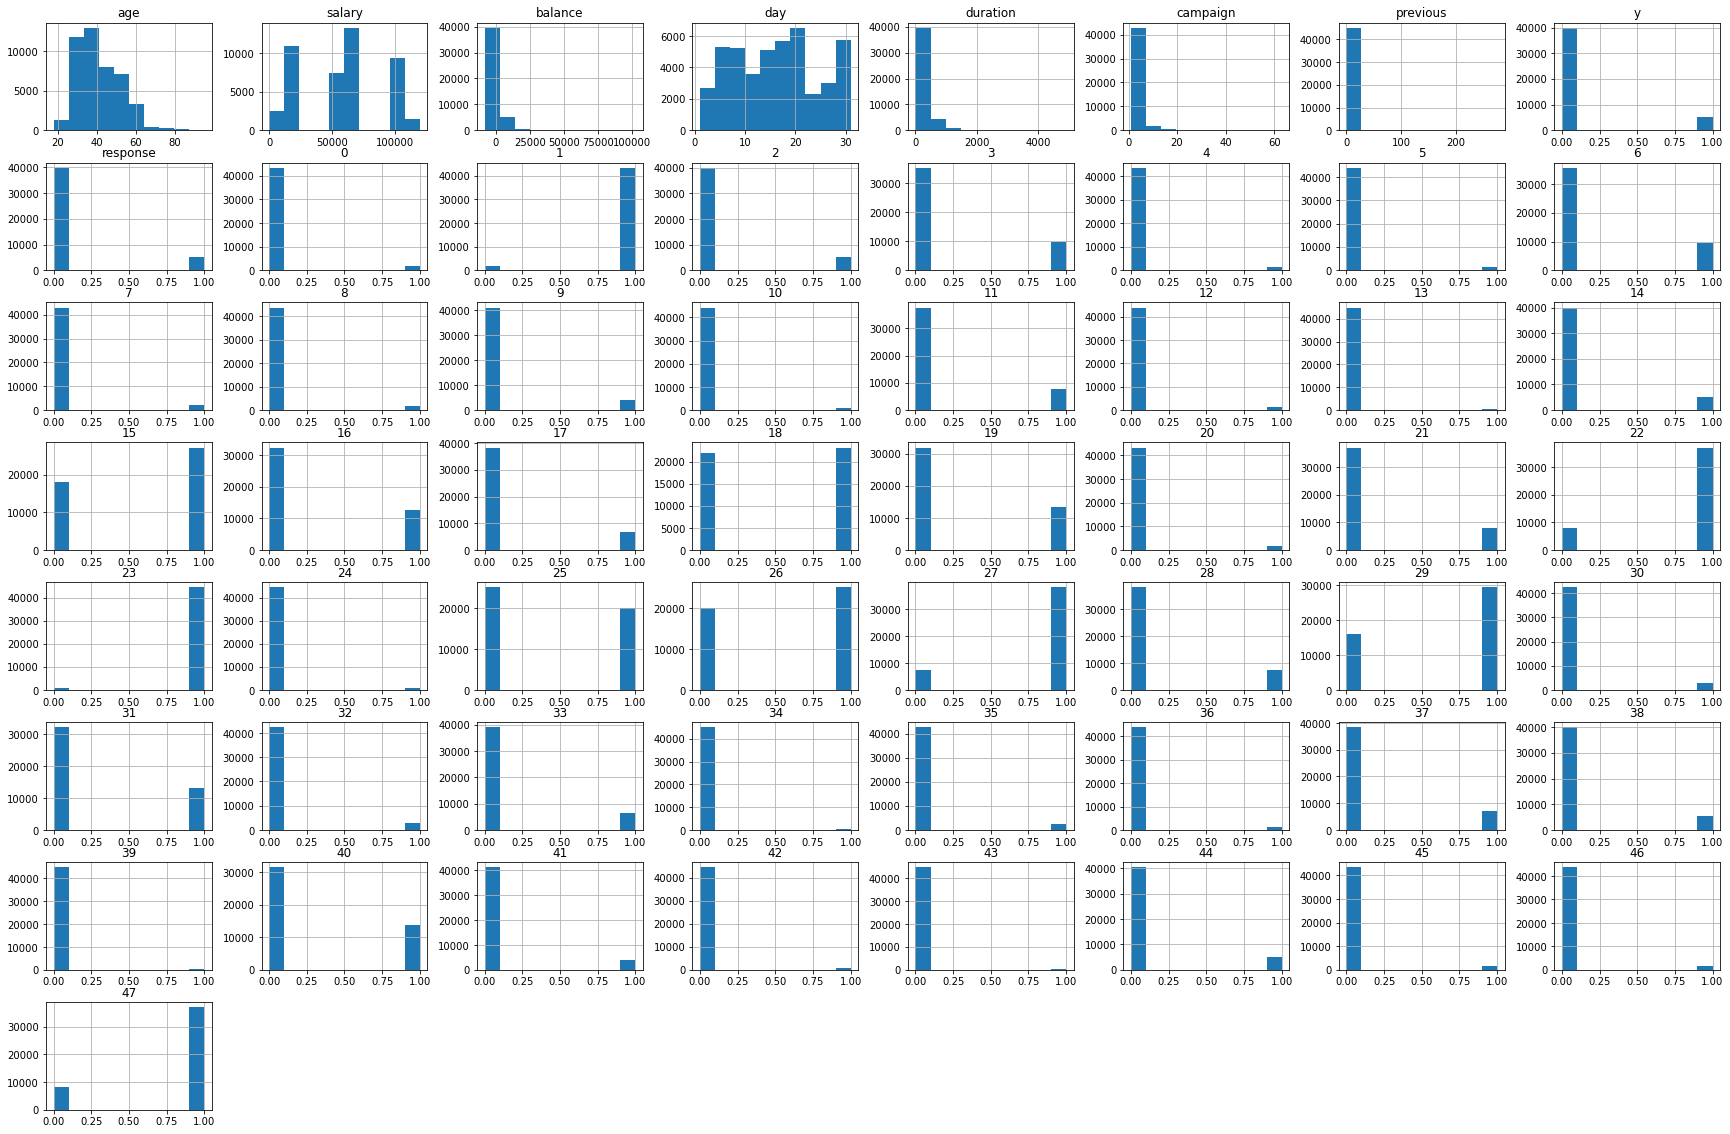

In [13]:
df_OH.hist(figsize=(30,20))
plt.show()

Age, Salary and Day are normally distributed.

###### Scale the data

In [14]:
scaler = StandardScaler()

numCols = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous']

df_OH[numCols] = scaler.fit_transform(df_OH[numCols])

df_OH.head()

,age,salary,balance,day,duration,campaign,previous,y,response,0,...,38,39,40,41,42,43,44,45,46,47
0,1.606965,1.339983,0.256419,-1.298476,0.011016,-0.569351,-0.25194,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.288529,0.093308,-0.437895,-1.298476,-0.416127,-0.569351,-0.25194,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.747384,1.963320,-0.446762,-1.298476,-0.707361,-0.569351,-0.25194,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.571051,-1.153366,0.047205,-1.298476,-0.645231,-0.569351,-0.25194,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.747384,-1.776703,-0.447091,-1.298476,-0.233620,-0.569351,-0.25194,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###### Check correlation of target and other features

In [15]:
df_OH.corr()[['y']].sort_values(by='y', ascending=False).T

,y,response,duration,46,0,25,29,39,42,43,...,15,28,22,3,campaign,40,26,1,31,47
y,1.0,1.0,0.394521,0.306788,0.140971,0.139173,0.135873,0.129456,0.128531,0.123185,...,-0.06026,-0.068185,-0.069039,-0.072083,-0.073172,-0.1025,-0.139173,-0.140971,-0.150935,-0.167051


In [16]:
dfTrain, dfTest = train_test_split(df_OH, test_size=0.2, random_state=20)


Questions:
1. when encoded cat.values we lost names for features, how to handle this?
2. 'balance' has skewed distribution, how and when to handle it?
3. target variable is imbalanced, when and how to handle this? tried with resample(), but it doesn't show up in the dataframe